<a href="https://colab.research.google.com/github/sunyingjian/study-tensorflow/blob/master/%E5%8D%AB%E6%98%9F%E5%9B%BE%E5%83%8F%E8%AF%86%E5%88%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/dataset"
os.chdir(path)
os.listdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['2_class']

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

TensorFlow 2.x selected.
tensorflow: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Using TensorFlow backend.


In [0]:
data_dir='/content/drive/My Drive/dataset/2_class'

In [0]:
data_root=pathlib.Path(data_dir)

In [5]:
for item in data_root.iterdir():
  print(item)

/content/drive/My Drive/dataset/2_class/airplane
/content/drive/My Drive/dataset/2_class/lake


In [0]:
all_image_path=list(data_root.glob('*/*'))

In [7]:
len(all_image_path)

1400

In [8]:
all_image_path=[str(path) for path in all_image_path]
all_image_path[10:12]

['/content/drive/My Drive/dataset/2_class/airplane/airplane_012.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_013.jpg']

In [0]:
import random
random.shuffle(all_image_path)

In [0]:
image_count=len(all_image_path)

In [11]:
label_names=sorted(item.name for item in data_root.glob('*/'))
label_names

['airplane', 'lake']

In [12]:
label_to_index=dict((name,index) for index,name in enumerate(label_names))
label_to_index

{'airplane': 0, 'lake': 1}

In [13]:
#获取路径来实现对图片做标签,通过下面的代码生成一个pathlib对象,那么他的上一层目录就剩他的label
pathlib.Path('/content/drive/My Drive/dataset/2_class/airplane/airplane_012.jpg').parent.name

'airplane'

In [0]:
#通过推导式 labe_to_index得到分组的编号
all_image_labe=[label_to_index[pathlib.Path(p).parent.name]for p in all_image_path]

In [16]:
all_image_labe[:5]

[1, 0, 0, 0, 0]

In [17]:
all_image_path[:5]

['/content/drive/My Drive/dataset/2_class/lake/lake_415.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_103.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_411.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_093.jpg',
 '/content/drive/My Drive/dataset/2_class/airplane/airplane_399.jpg']

In [0]:
import IPython.display as display
index_to_label=dict((v,k) for k,v in label_to_index.items())
#这样我们就可以通过这个字典获取到 

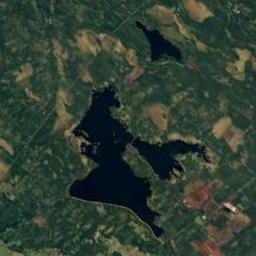

lake



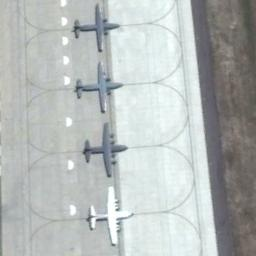

airplane



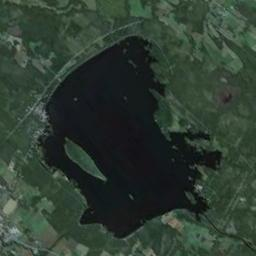

lake



In [27]:
for n in range(3):
  image_index=random.choice(range(len(all_image_path)))
  display.display(display.Image(all_image_path[image_index]))
  print(index_to_label[all_image_labe[image_index]])
  print()

In [0]:
img_path=all_image_path[0]